In [14]:
import numpy as np
import matplotlib.pyplot as plt
from image_analyzer import Image_analyzer
import os

In [15]:
file_dir = os.getcwd()
images_dir = file_dir+'/images/'
fig_03_38_path = images_dir+'Fig0338(a)(blurry_moon).pgm'

fig_03_38_analyzer = Image_analyzer(fig_03_38_path)
#read image
fig_03_38_analyzer.mypgmread()

Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0338(a)(blurry_moon).pgm


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 466,
 540,
 255)

In [16]:
laplacian_filter = np.array([[0, 1,  0],
                             [1, -4, 1],
                             [0,  1, 0]])
laplacian_image_without_scaling = fig_03_38_analyzer.myImageCorrelation(laplacian_filter)
laplacian_image_scaled = Image_analyzer().image_array_scale(laplacian_image_without_scaling)
sharp_image = fig_03_38_analyzer.get_image_array() - laplacian_image_without_scaling
sharp_image_scaled = np.clip( Image_analyzer().image_array_scale(sharp_image) , 0, 255)

laplacian_filter_1 = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1,  1, 1]])
laplacian_image_without_scaling_1 = fig_03_38_analyzer.myImageCorrelation(laplacian_filter_1)
sharp_image_1 = np.clip(fig_03_38_analyzer.get_image_array() - laplacian_image_without_scaling_1, 0, 255)


Text(0.5, 1.0, 'Fig3.38 (e): Sharpened Image with scaling')

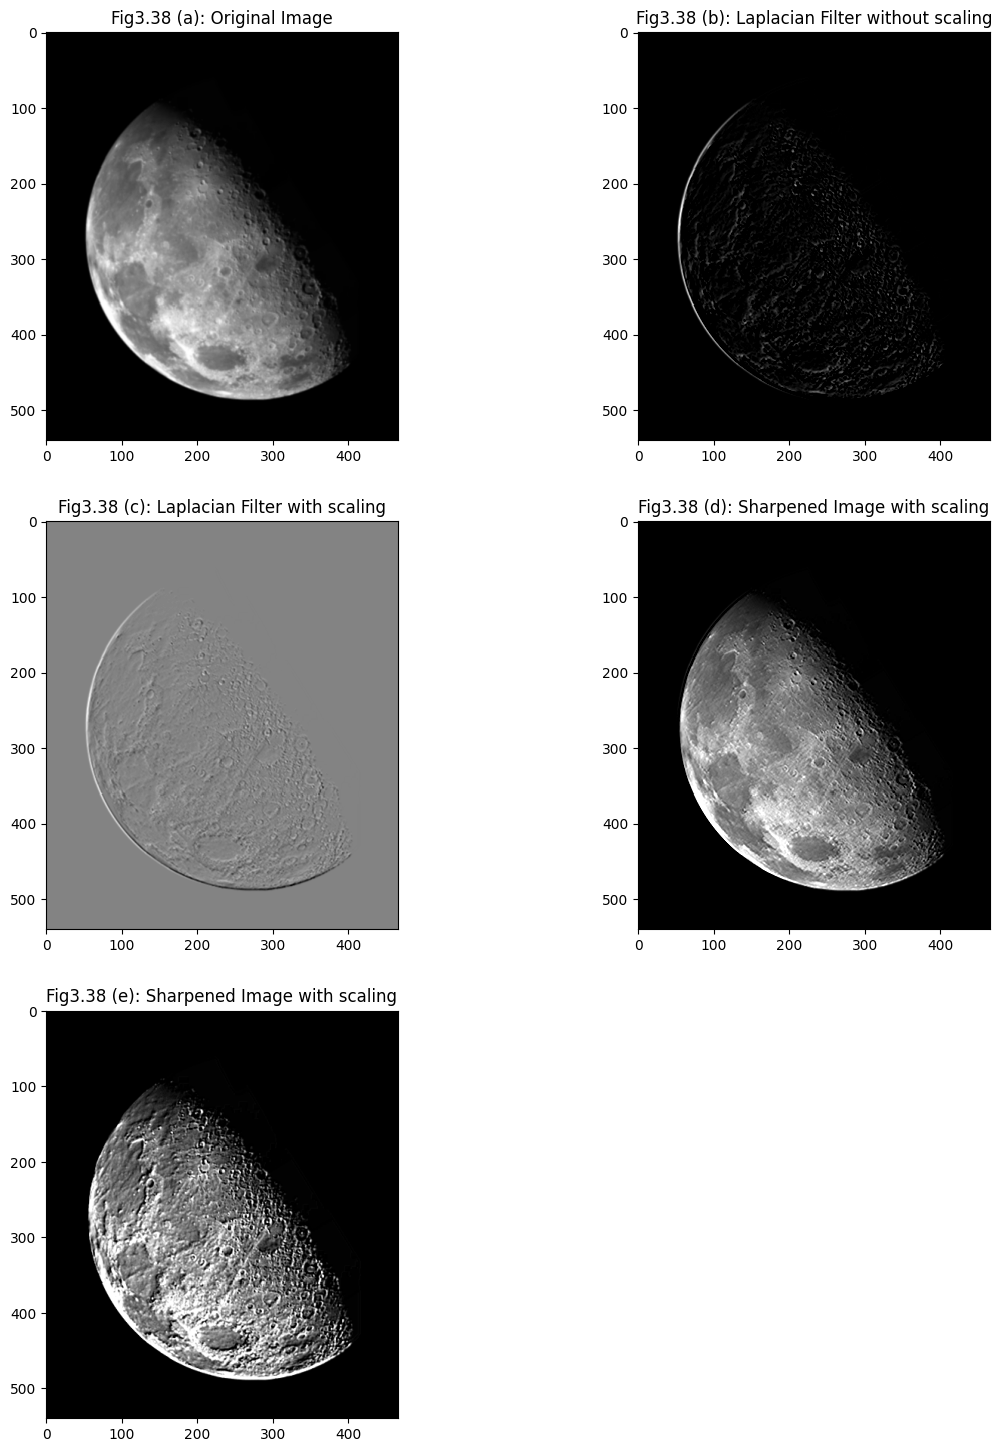

In [17]:
plt.figure(figsize=(14, 18))

plt.subplot(3, 2, 1)
plt.imshow(fig_03_38_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.38 (a): Original Image')

plt.subplot(3, 2, 2)
plt.imshow(laplacian_image_without_scaling, cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.38 (b): Laplacian Filter without scaling')

plt.subplot(3, 2, 3)
plt.imshow(laplacian_image_scaled, cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.38 (c): Laplacian Filter with scaling')

plt.subplot(3, 2, 4)
plt.imshow(sharp_image, cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.38 (d): Sharpened Image with scaling')

plt.subplot(3, 2, 5)
plt.imshow(sharp_image_1, cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.38 (e): Sharpened Image with scaling')



In [5]:
fig_03_40_path = images_dir+'Fig0340(a)(dipxe_text).pgm'

fig_03_40_analyzer = Image_analyzer(fig_03_40_path)
#read image
fig_03_40_analyzer.mypgmread()


Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0340(a)(dipxe_text).pgm


(array([[51, 51, 51, ..., 51, 51, 51],
        [51, 51, 51, ..., 51, 51, 51],
        [51, 51, 51, ..., 51, 51, 51],
        ...,
        [51, 51, 51, ..., 51, 51, 51],
        [51, 51, 51, ..., 51, 51, 51],
        [51, 51, 51, ..., 51, 51, 51]], dtype=uint8),
 320,
 138,
 255)

[[0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.03965895 0.04685151 0.04952803 0.04685151 0.03965895]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]]


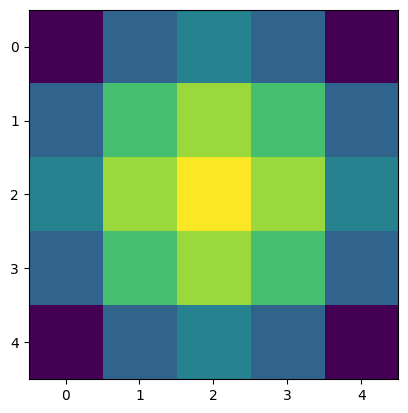

In [6]:
gaussian_filter_5x5 = Image_analyzer().get_gaussian_filter(5, 3)

print(gaussian_filter_5x5)
plt.imshow(gaussian_filter_5x5)


gaussian_image = fig_03_40_analyzer.myImageCorrelation(gaussian_filter_5x5)
uncharp_mask = fig_03_40_analyzer.get_image_array() - gaussian_image
uncharp_mask_used_fig = np.clip(fig_03_40_analyzer.get_image_array() + uncharp_mask, 0, 255)
high_boost_filtered = fig_03_40_analyzer.get_image_array() + 4.5 * uncharp_mask

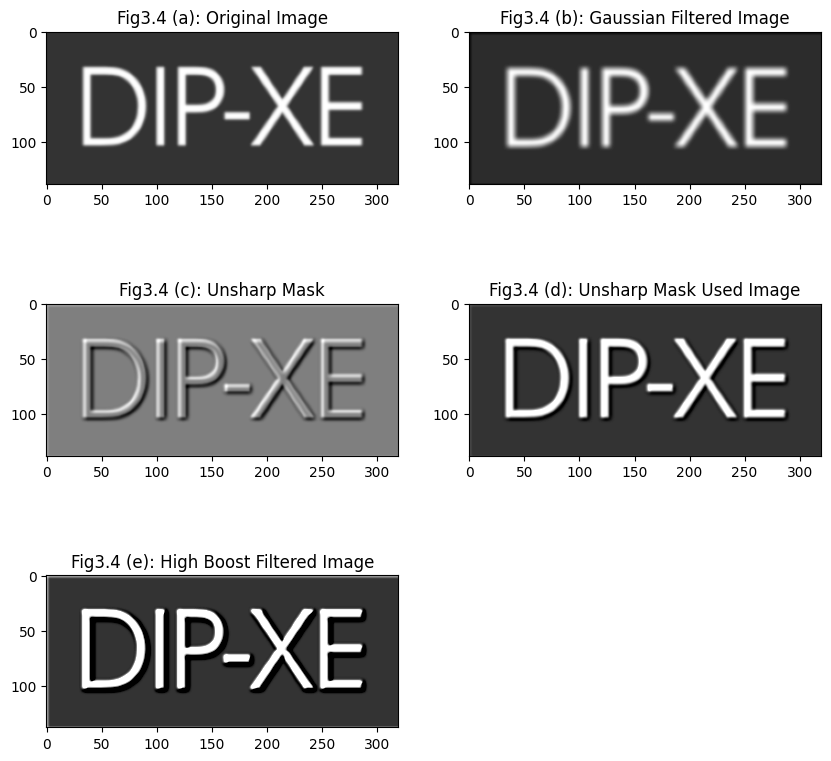

In [7]:
# plot all the images
plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.imshow(fig_03_40_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Fig3.4 (a): Original Image')

plt.subplot(3, 2, 2)
plt.imshow(gaussian_image, cmap='gray')
plt.title('Fig3.4 (b): Gaussian Filtered Image')

plt.subplot(3, 2, 3)
plt.imshow(uncharp_mask, cmap='gray')
plt.title('Fig3.4 (c): Unsharp Mask')

plt.subplot(3, 2, 4)
plt.imshow(uncharp_mask_used_fig, cmap='gray', vmin = 0, vmax = 255)
plt.title('Fig3.4 (d): Unsharp Mask Used Image')

plt.subplot(3, 2, 5)
plt.imshow(high_boost_filtered, cmap='gray',vmin=0, vmax=255)
plt.title('Fig3.4 (e): High Boost Filtered Image')
plt.show()


In [8]:
fig_03_20_2_path = images_dir+'Fig0320(1)(top_left).pgm'
fig_03_20_2_analyzer = Image_analyzer(fig_03_20_2_path)
#read image
fig_03_20_2_analyzer.mypgmread()

fig_03_20_3_path = images_dir+'Fig0320(2)(2nd_from_top).pgm'
fig_03_20_3_analyzer = Image_analyzer(fig_03_20_3_path)
#read image
fig_03_20_3_analyzer.mypgmread()

fig_03_20_4_path = images_dir+'Fig0320(3)(third_from_top).pgm'
fig_03_20_4_analyzer = Image_analyzer(fig_03_20_4_path)
#read image
fig_03_20_4_analyzer.mypgmread()

fig_03_20_1_path = images_dir+'Fig0320(4)(bottom_left).pgm'
fig_03_20_1_analyzer = Image_analyzer(fig_03_20_1_path)
#read image
fig_03_20_1_analyzer.mypgmread()


Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0320(1)(top_left).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0320(2)(2nd_from_top).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0320(3)(third_from_top).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/003_pgn_shapening_and_histogram/images/Fig0320(4)(bottom_left).pgm


(array([[13, 13, 13, ..., 36, 36, 33],
        [13, 13, 13, ..., 35, 35, 31],
        [13, 13, 13, ..., 29, 29, 26],
        ...,
        [19, 13, 13, ..., 58, 56, 56],
        [20, 15, 13, ..., 56, 56, 53],
        [22, 18, 13, ..., 55, 55, 49]], dtype=uint8),
 500,
 500,
 255)

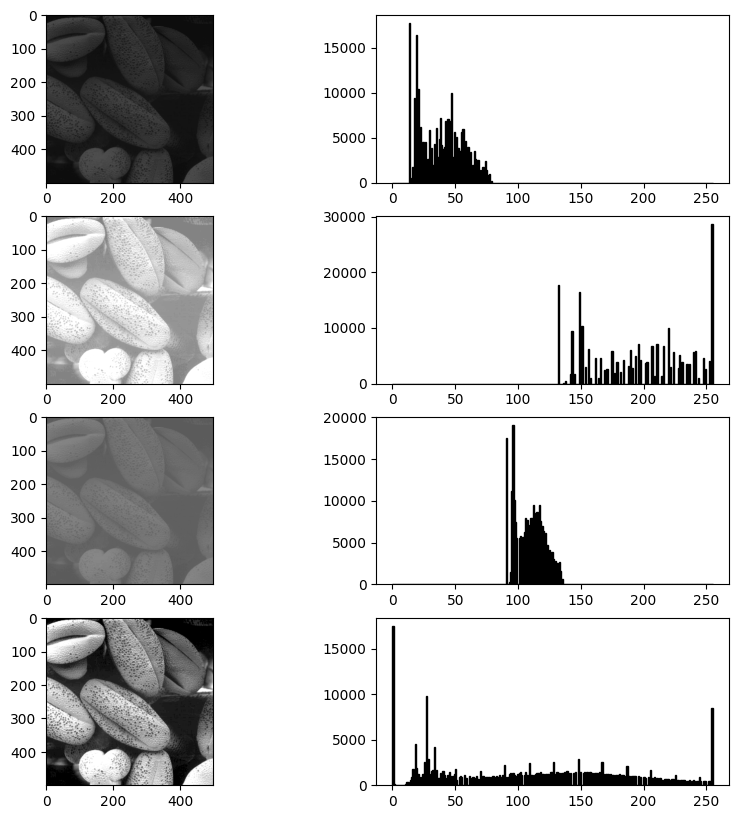

In [9]:
#show all figures with their histograms as subplots
plt.figure(figsize=(10, 10))
plt.subplot(4, 2, 1)
plt.imshow(fig_03_20_1_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)

plt.subplot(4, 2, 2)
plt.hist(fig_03_20_1_analyzer.get_image_array().ravel(), bins=256, range=(0, 255), fc='k', ec='k')

plt.subplot(4, 2, 3)
plt.imshow(fig_03_20_2_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)

plt.subplot(4, 2, 4)
plt.hist(fig_03_20_2_analyzer.get_image_array().ravel(), bins=256, range=(0, 255), fc='k', ec='k')

plt.subplot(4, 2, 5)
plt.imshow(fig_03_20_3_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)

plt.subplot(4, 2, 6)
plt.hist(fig_03_20_3_analyzer.get_image_array().ravel(), bins=256, range=(0, 255), fc='k', ec='k')

plt.subplot(4, 2, 7)
plt.imshow(fig_03_20_4_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)

plt.subplot(4, 2, 8)
plt.hist(fig_03_20_4_analyzer.get_image_array().ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.show()



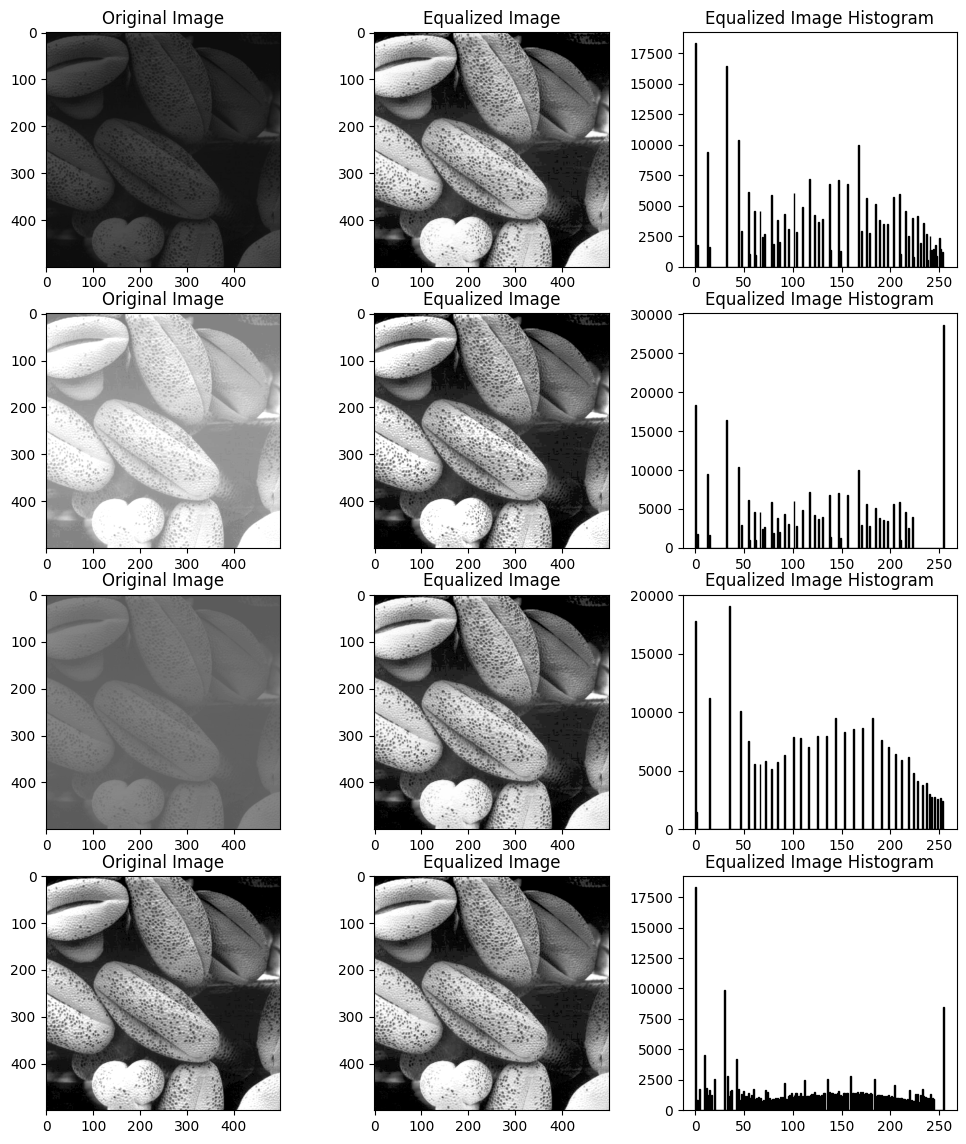

In [10]:
#show all figures , and their equalized images and equalized images histograms as subplots
plt.figure(figsize=(12, 14))
plt.subplot(4, 3, 1)
plt.imshow(fig_03_20_1_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.subplot(4, 3, 2)
fig_03_20_1_equalized = Image_analyzer().image_array_scale(fig_03_20_1_analyzer.myImageHistogramEqualization())
plt.imshow(fig_03_20_1_equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Equalized Image')

plt.subplot(4, 3, 3)
plt.hist(fig_03_20_1_equalized.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.title('Equalized Image Histogram')

plt.subplot(4, 3, 4)
plt.imshow(fig_03_20_2_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.subplot(4, 3, 5)
fig_03_20_2_equalized = Image_analyzer().image_array_scale(fig_03_20_2_analyzer.myImageHistogramEqualization())
plt.imshow(fig_03_20_2_equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Equalized Image')

plt.subplot(4, 3, 6)
plt.hist(fig_03_20_2_equalized.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.title('Equalized Image Histogram')

plt.subplot(4, 3, 7)
plt.imshow(fig_03_20_3_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.subplot(4, 3, 8)
fig_03_20_3_equalized = Image_analyzer().image_array_scale(fig_03_20_3_analyzer.myImageHistogramEqualization())
plt.imshow(fig_03_20_3_equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Equalized Image')

plt.subplot(4, 3, 9)
plt.hist(fig_03_20_3_equalized.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.title('Equalized Image Histogram')

plt.subplot(4, 3, 10)
plt.imshow(fig_03_20_4_analyzer.get_image_array(), cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.subplot(4, 3, 11)
fig_03_20_4_equalized = Image_analyzer().image_array_scale(fig_03_20_4_analyzer.myImageHistogramEqualization())
plt.imshow(fig_03_20_4_equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Equalized Image')

plt.subplot(4, 3, 12)
plt.hist(fig_03_20_4_equalized.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.title('Equalized Image Histogram')
plt.show()




